In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import sys
sys.path.append('../')
import degrade_photometry

In [2]:
catalog = Table.read('../data/COSMOS_11bands-SExtractor-Lephare.fits')

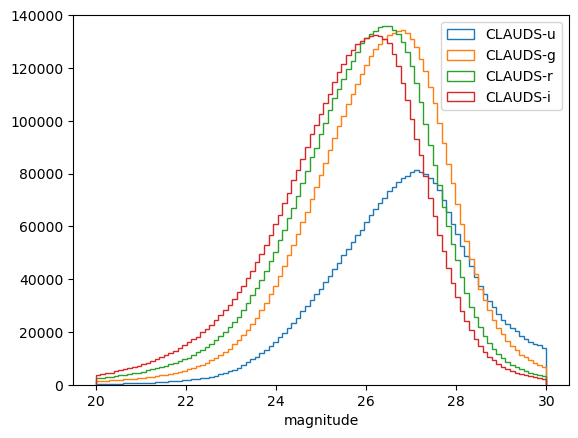

In [3]:
plt.hist(catalog['u'], bins=np.linspace(20, 30, 100), label = 'CLAUDS-u', histtype = 'step')
plt.hist(catalog['g'], bins=np.linspace(20, 30, 100), label = 'CLAUDS-g', histtype = 'step')
plt.hist(catalog['r'], bins=np.linspace(20, 30, 100), label = 'CLAUDS-r', histtype = 'step')
plt.hist(catalog['i'], bins=np.linspace(20, 30, 100), label = 'CLAUDS-i', histtype = 'step')
plt.ylim(0, 140000)
plt.xlabel('magnitude')
plt.legend()
plt.show()

In [4]:
mag_depth_r_deep = 26.6
mag_depth_r_shallow = 25.5
catalog_shallow = degrade_photometry.degrade(catalog, ['r'], [mag_depth_r_deep], [mag_depth_r_shallow], 'degraded')

/pbs/throng/lsst/users/cpayerne/WP221_Target_selection/notebooks/../degrade_photometry.py:9: RuntimeWarning: invalid value encountered in log10
  return 22.5 - 2.5 * np.log10(fluxs)


/tmp/ipykernel_7972/4158160782.py:13: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  plt.hist(catalog_shallow['r'][mask_sel_detect],


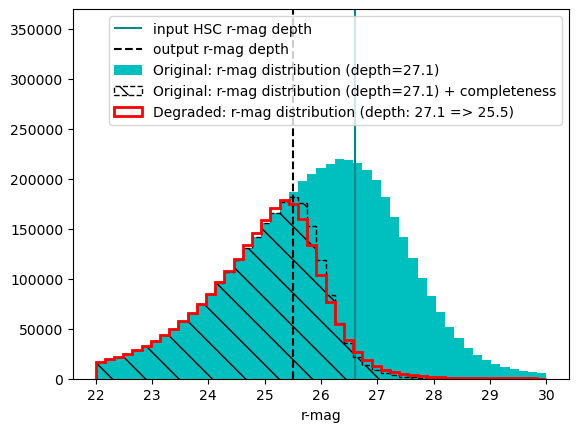

In [5]:
from scipy.special import erf
plt.figure(dpi=100)

plt.vlines(mag_depth_r_deep, 0, 1000000, color='darkcyan', label = 'input HSC r-mag depth')
plt.vlines(mag_depth_r_shallow, 0, 1000000, ls='--',color='k', label = 'output r-mag depth')
bins = np.linspace(22, 30, 50)
plt.hist(catalog_shallow['r'], bins = bins, label = 'Original: r-mag distribution (depth=27.1)', color = 'c')

c1 = degrade_photometry.Probability_detect_minput(catalog_shallow['r'], mag_depth_r_shallow, Nsigma=3)
rand = np.random.random(len(c1))
mask_sel_detect = rand < c1

plt.hist(catalog_shallow['r'][mask_sel_detect],
         bins =bins, histtype='step', ls='--', color = 'k', label = 'Original: r-mag distribution (depth=27.1) + completeness', hatch='\ ')

plt.hist(catalog_shallow['r_degraded'][mask_sel_detect], bins = bins, histtype='step', color='r',lw=2, 
         label = 'Degraded: r-mag distribution (depth: 27.1 => 25.5)')
#
plt.legend()
plt.xlabel('r-mag')
plt.ylim(0, 370000)
plt.show()